In [13]:
"""Contains functions for data processing"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


def read(filename='voice.csv'):
    """
    Read data from file.

    :param filename:  Name of file containing data.
    :return: data.
    """
    data = None
    try:
        data = pd.read_csv(filename)  # read data from csv file
        print('\nReading data...')
    except FileNotFoundError:
        print('\nFile not found!')  # print error if file is absent

    return data


def scale(data):
    """
    Scale the data between -1 and 1.

    :param data: The data to be scaled.
    :return: Scaled data.
    """
    return (data - data.mean()) / (data.max() - data.min())


def preprocess(data):
    """
    Preprocess data.

    :param data: Data to be preprocessed.
    :return: x_train, y_train, x_test, y_test
    """
    print('\nPreprocessing data...')

    x = data.iloc[:, :-1]  # get inputs from data
    x = scale(x)  # scale inputs

    y = data.iloc[:, -1]  # get outputs
    y = LabelEncoder().fit_transform(y)  # encode label (female -> 0, male -> 1)

    # split into training and testing data with randomized order and return
    return train_test_split(x, y, train_size=.75, random_state=1)


def visualize(data, style='ggplot', graph_type='line'):
    """
    Visualize data.

    :param data: Data to visualize. (pandas dataframe)
    :param style: matplotlib style. def = 'ggplot'
    :param graph_type: Graph type ('line' or 'area'). def = 'line'
    :return: None
    """
    try:
        plt.style.use(style)
    except OSError:
        print('\nInvalid style!\nUsing ggplot\n')
        plt.style.use('ggplot')
    if graph_type == 'line':
        data.plot()
    elif graph_type == 'area':
        data.plot.area(stacked=False)
    else:
        print('\nInvalid type!\nUsing line')
        data.plot()
    plt.show()


def get_accuracy(x_train, x_test, y_train, y_test, clf):
    """
    Calculate and print training and testing accuracy.
    :param x_train: Training inputs.
    :param y_train: Training Outputs.
    :param x_test: Testing inputs.
    :param y_test: Testing outputs.
    :param clf: Trained classifier object.
    :return: None
    """
    print('\nTraining Results:')
    correct = 0
    for index in range(len(y_train)):
        temp=x_train.iloc[index,:]
        temp=np.array(temp).reshape((1,-1))
        predicted = clf.predict(temp)
        actual = y_train[index]
        if actual == predicted:
            correct += 1
    print('Accuracy = %.1f%%' % (correct / len(y_train) * 100))

    tp = tn = fp = fn = 0
    for index in range(len(y_test)):
        temp1=x_test.iloc[index,:]
        temp1=np.array(temp1).reshape((1,-1))
        predicted = clf.predict(temp1)
        actual = y_test[index]
        if actual == predicted == 0:
            tn += 1
        elif actual == predicted == 1:
            tp += 1
        elif actual == 0 != predicted:
            fp += 1
        else:
            fn += 1
    # print(tp, fp, tn, fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print('\nTesting Results:')
    print('Accuracy  = %.1f%%' % (accuracy * 100))
    print('Precision   = %.1f%%' % (precision * 100))
    print('Recall      = %.1f%%' % (recall * 100))
    print('Specificity = %.1f%%' % (specificity * 100))


In [14]:
"""Compare different classifiers."""
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

clf_names = ('Nearest Neighbors', 'SVM', 'Decision Tree', 'Random Forest', 'Neural Net')  # classifier names
clfs = (KNeighborsClassifier(n_neighbors=100, weights='distance'), SVC(), DecisionTreeClassifier(),
        RandomForestClassifier(), MLPClassifier())  # classifier objects


def train_clf(x_train, y_train, clf):
    """
    Train classifier.
    :param x_train: Training inputs.
    :param y_train: Training outputs.
    :param clf: Untrained classifier object.
    :return: Trained classifier object.
    """
    clf.fit(x_train, y_train)  # train classifier

    return clf


def run():
    """
    main.
    :return: None
    """
    voice_data = read()  # read data
    x_train, x_test, y_train, y_test = preprocess(voice_data)  # preprocess data

    for clf_name, clf in zip(clf_names, clfs):  # for all classifiers
        clf = train_clf(x_train, y_train, clf)  # train classifier
        print()
        print(clf_name)
        get_accuracy(x_train, x_test, y_train, y_test, clf)  # print results



In [15]:
run()


Reading data...

Preprocessing data...

Nearest Neighbors

Training Results:
Accuracy = 100.0%

Testing Results:
Accuracy  = 94.2%
Precision   = 91.0%
Recall      = 98.2%
Specificity = 90.1%

SVM

Training Results:
Accuracy = 96.8%

Testing Results:
Accuracy  = 96.7%
Precision   = 95.8%
Recall      = 97.8%
Specificity = 95.7%

Decision Tree

Training Results:
Accuracy = 100.0%

Testing Results:
Accuracy  = 97.2%
Precision   = 97.7%
Recall      = 96.8%
Specificity = 97.7%

Random Forest

Training Results:
Accuracy = 99.8%

Testing Results:
Accuracy  = 98.1%
Precision   = 98.7%
Recall      = 97.5%
Specificity = 98.7%

Neural Net

Training Results:
Accuracy = 98.3%

Testing Results:
Accuracy  = 97.7%
Precision   = 98.0%
Recall      = 97.5%
Specificity = 98.0%


In [16]:
import pickle
import warnings

from sklearn.neural_network import MLPClassifier
def train_neural_net(x_train, y_train):
    """
    Train and save neural net.
    :param x_train: Training inputs.
    :param y_train: Training outputs.
    :return: Trained neural_net
    """
    print('\nTraining neural net...')
    neural_net = MLPClassifier()
    # (hidden_layer_sizes=(40, 40), activation='identity', solver='sgd',
    #                        learning_rate='adaptive', max_iter=2000, verbose=True)
    neural_net.fit(x_train, y_train)  # train neural net

    # print(neural_net.coefs_)

    print('\nSaving trained neural net to file...')
    pickle.dump(neural_net, open('trained_neural_net', 'wb'))

    visualize(pd.Series(neural_net.loss_curve_), graph_type='area')  # plot loss curve

    return neural_net


def nrun():
    """
    main.
    :return: None
    """
    voice_data = read()  # read data

    x_train, x_test, y_train, y_test = preprocess(voice_data)  # preprocess data

    trained_neural_net = train_neural_net(x_train, y_train)  # train neural net

    print('\nCalculating accuracy...\n')
    get_accuracy(x_train, x_test, y_train, y_test, trained_neural_net)  # print results



Reading data...

Preprocessing data...

Training neural net...

Saving trained neural net to file...


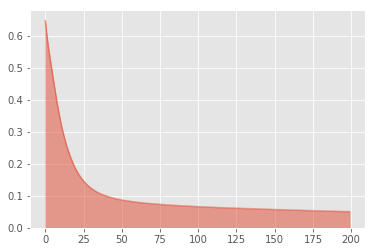


Calculating accuracy...


Training Results:
Accuracy = 98.1%

Testing Results:
Accuracy  = 97.7%
Precision   = 98.2%
Recall      = 97.2%
Specificity = 98.2%


In [17]:
nrun()

In [18]:
print('\n\nPreprocessing extracted data...')
data = pd.read_csv('output/voiceDetails.csv')
del data['peakf'], data['sound.files'], data['selec'], data['duration']
dataset = pd.read_csv('voice.csv')
dataset = dataset.iloc[:, :-1]
data = (data - dataset.mean()) / (dataset.max() - dataset.min())  # scale
trained_neural_net = pickle.load(open('trained_neural_net', 'rb'))  # load trained neural net from file
print('\nPrediction: \r')
print('Female' if trained_neural_net.predict(data)[0] == 0 else 'Male') 



Preprocessing extracted data...

Prediction: 
Male
